validate/validate-ccdft-2024-06-09-11-41-40-302/train.csv


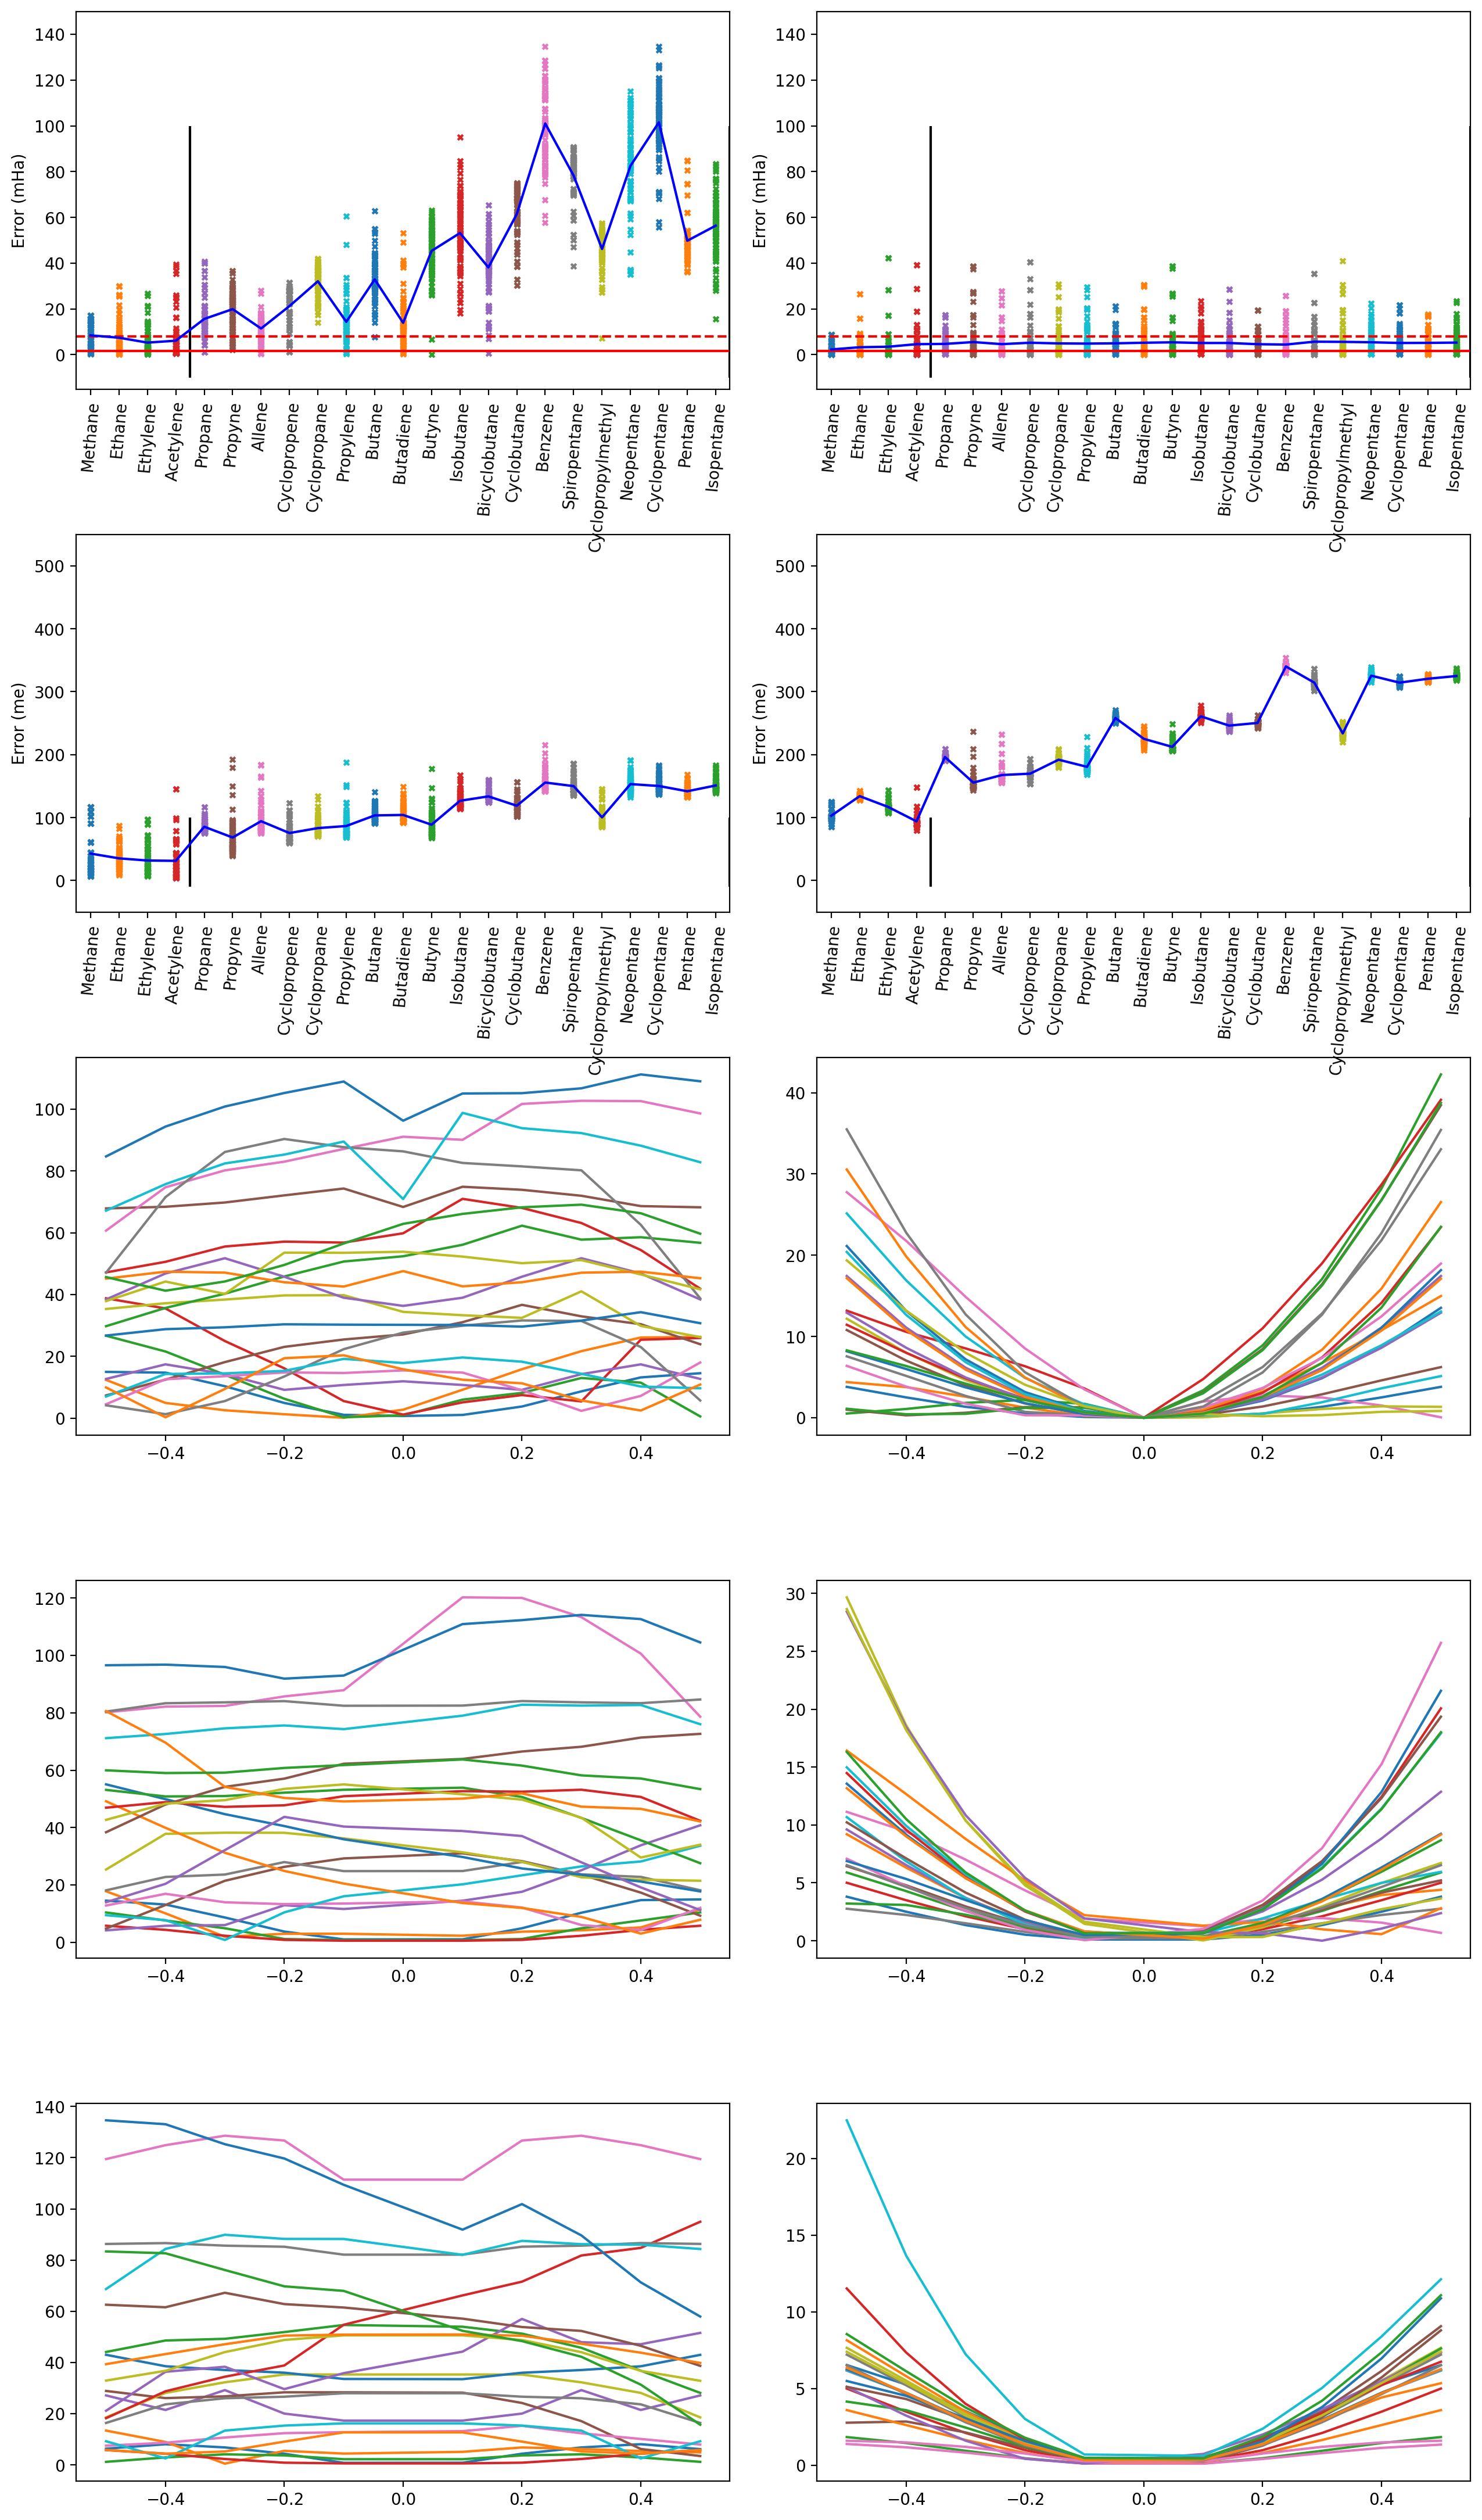

In [9]:
from pathlib import Path
import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


TRAIN_STR_DICT = [
    "Methane",
    "Ethane",
    "Ethylene",
    "Acetylene",
    # "Propane",
]
EVAL_STR_DICT = [
    "Propane",
    "Propyne",
    "Allene",
    "Cyclopropene",
    "Cyclopropane",
    "Propylene",
    "Butane",
    "Butadiene",
    "Butyne",
    "Isobutane",
    "Bicyclobutane",
    "Cyclobutane",
    "Benzene",
    "Spiropentane",
    "Cyclopropylmethyl",
    "Neopentane",
    "Cyclopentane",
    "Pentane",
    "Isopentane",
]

f, axes = plt.subplots(5, 2, figsize=(15, 25))
axes = axes.reshape(5, 2)

begin_y = 0.075
end_y = 0.925
int_y = 0.05
begin_x = 0.125
end_x = 0.925
int_x = 0.05
end_x += int_x
end_y += int_y

shapexy = np.shape(axes)
inter_x = np.linspace(begin_x, end_x, shapexy[1] + 1)
inter_y = np.linspace(begin_y, end_y, shapexy[0] + 1)

delta_x = inter_x[1] - inter_x[0] - int_x
delta_y = inter_y[1] - inter_y[0] - int_y

for i in range(shapexy[0]):
    for j in range(shapexy[1]):
        axes[i][j].set_position(
            [
                inter_x[j],
                inter_y[i],
                inter_x[j + 1] - inter_x[j] - int_x,
                inter_y[i + 1] - inter_y[i] - int_y,
            ]
        )

axes = axes[::-1, :]

# model_number = "2024-05-31-11-36-26-200"
model_number = "validate-ccdft-2024-06-09-11-41-40-302"
# load_name = f"checkpoints/checkpoint-ccdft-{model_number}"
load_name = f"validate/{model_number}"
load_path = Path(f"{load_name}")

list_of_path_dft = list(Path("validate/").glob("*DFT*"))
load_path_dft = max(list_of_path_dft, key=lambda p: p.stat().st_ctime)

list_of_load_path_train = list(load_path.glob("train.csv"))
load_path_train = max(list_of_load_path_train, key=lambda p: p.stat().st_ctime)
print(load_path_train)
data = pd.read_csv(load_path_train)

loss_rho_l, loss_ene_l = [], []
number_draw = 0

for dict_ in [TRAIN_STR_DICT, EVAL_STR_DICT]:
    for i_name in dict_:
        data_tmp = data.loc[data["name"].str.contains(i_name)]

        data_loss_rho = data_tmp["loss_rho"]
        data_loss_ene = data_tmp["loss_ene"]

        loss_rho_l.append(data_loss_rho.mean())
        loss_ene_l.append(data_loss_ene.mean())

        name_list = data_tmp["name"].values
        for i in range(len(name_list)):
            name_list[i] = float(name_list[i].split("_")[-1])

        axes[0, 0].scatter(
            np.zeros_like(data_loss_ene) + number_draw, data_loss_ene, s=10, marker="x"
        )
        axes[1, 0].scatter(
            np.zeros_like(data_loss_rho) + number_draw, data_loss_rho, s=10, marker="x"
        )
        axes[2, 0].plot(name_list[:11], data_loss_ene.values[:11])
        axes[3, 0].plot(name_list[11:21], data_loss_ene.values[11:21])
        axes[4, 0].plot(name_list[21:31], data_loss_ene.values[21:31])
        number_draw += 1

    axes[0, 0].vlines(number_draw - 0.5, -10, 100, "k")
    axes[1, 0].vlines(number_draw - 0.5, -10, 100, "k")
i += 1

axes[0, 0].hlines(1 / 0.627, -0.5, 100 - 0.5, "r")
axes[0, 0].hlines(5 / 0.627, -0.5, 100 - 0.5, "r", linestyle="--")
axes[0, 0].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), loss_ene_l, "b")
axes[1, 0].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), loss_rho_l, "b")

## DFT
data = pd.read_csv(load_path_dft / "train.csv")
loss_rho_l, loss_ene_l = [], []
number_draw = 0

for dict_ in [TRAIN_STR_DICT, EVAL_STR_DICT]:
    for i_name in dict_:
        data_eq = data.loc[data["name"].str.contains(f"{i_name}_0_1_0.0000")]
        data_tmp = data.loc[data["name"].str.contains(i_name)]

        data_loss_rho = np.abs(data_tmp["loss_rho"])
        data_loss_ene = np.abs(data_tmp["loss_ene"] - data_eq["loss_ene"].values[0])

        name_list = data_tmp["name"].values
        for i in range(len(name_list)):
            name_list[i] = float(name_list[i].split("_")[-1])

        loss_rho_l.append(data_loss_rho.mean())
        loss_ene_l.append(data_loss_ene.mean())

        axes[0, 1].scatter(
            np.zeros_like(data_loss_ene) + number_draw, data_loss_ene, s=10, marker="x"
        )
        axes[1, 1].scatter(
            np.zeros_like(data_loss_rho) + number_draw, data_loss_rho, s=10, marker="x"
        )
        axes[2, 1].plot(name_list[0:11], data_loss_ene.values[0:11])
        axes[3, 1].plot(name_list[11:21], data_loss_ene.values[11:21])
        axes[4, 1].plot(name_list[21:31], data_loss_ene.values[21:31])
        number_draw += 1
    axes[0, 1].vlines(number_draw - 0.5, -10, 100, "k")
    axes[1, 1].vlines(number_draw - 0.5, -10, 100, "k")
i += 1

axes[0, 1].hlines(1 / 0.627, -0.5, 100 - 0.5, "r")
axes[0, 1].hlines(5 / 0.627, -0.5, 100 - 0.5, "r", linestyle="--")
axes[0, 1].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), loss_ene_l, "b")
axes[1, 1].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), loss_rho_l, "b")

for i_row in range(2):
    for i_col in range(2):
        axes[i_row, i_col].set_xticks(
            range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)),
            TRAIN_STR_DICT + EVAL_STR_DICT,
            rotation=85,
        )
        axes[i_row, i_col].set_xlim(-0.5, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.5)
        axes[i_row, i_col].set_xlim(-0.5, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.5)

axes[0, 0].set_ylim(-15, 150)
axes[0, 0].set_ylabel("Error (mHa)")
axes[1, 0].set_ylim(-50, 550)
axes[1, 0].set_ylabel("Error (me)")
axes[0, 1].set_ylim(-15, 150)
axes[0, 1].set_ylabel("Error (mHa)")
axes[1, 1].set_ylim(-50, 550)
axes[1, 1].set_ylabel("Error (me)")
plt.savefig(
    f"./manu/figures/{model_number}.pdf",
    bbox_inches="tight",
)

In [3]:
name_list = data_tmp["name"].values
for i in range(len(name_list)):
    name_list[i] = float(name_list[i].split("_")[-1])
name_list

array([-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, -0.5,
       -0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5, -0.5, -0.4, -0.3,
       -0.2, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5, -0.5, -0.4, -0.3, -0.2, -0.1,
       0.1, 0.2, 0.3, 0.4, 0.5, -0.5, -0.4, -0.3, -0.2, -0.1, 0.1, 0.2,
       0.3, 0.4, 0.5, -0.5, -0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4,
       0.5, -0.5, -0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5, -0.5,
       -0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5, -0.5, -0.4, -0.3,
       -0.2, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5], dtype=object)

In [8]:
for i in range(1):
    print(i)
print()
for i in range(1)[::-1]:
    print(i)

0

0


,name,loss_rho,loss_ene
0,Methane_0_1_-0.5000,23.818308,0.804688
1,Methane_0_1_-0.4000,18.273802,0.867801
2,Methane_0_1_-0.3000,18.522665,0.417797
3,Methane_0_1_-0.2000,19.421247,0.007402
4,Methane_0_1_-0.1000,19.957577,0.866925
...,...,...,...
1724,Isopentane_2_3_0.1000,198.852055,72.837406
1725,Isopentane_2_3_0.2000,211.668473,91.077228
1726,Isopentane_2_3_0.3000,223.737862,85.934916
1727,Isopentane_2_3_0.4000,233.660665,89.666437
